In [18]:
from pathlib import Path

from pandas import DataFrame, read_csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
results_path = Path("../../profiling/dining/2022-12-12_22-15.csv")

In [10]:
df = read_csv(results_path, index_col=0)

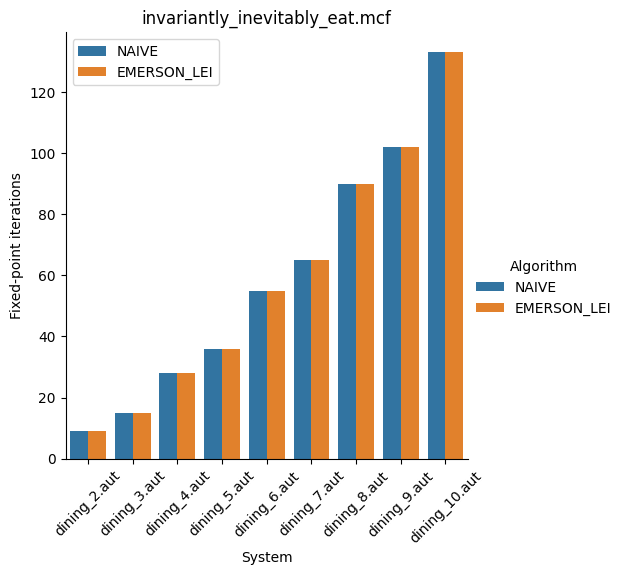

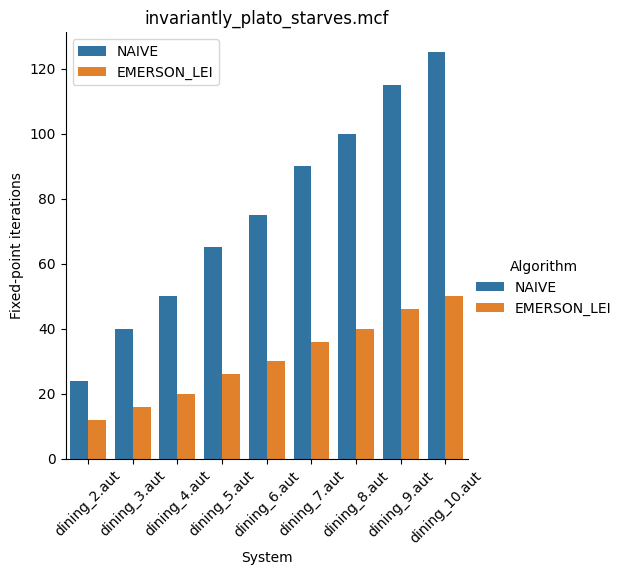

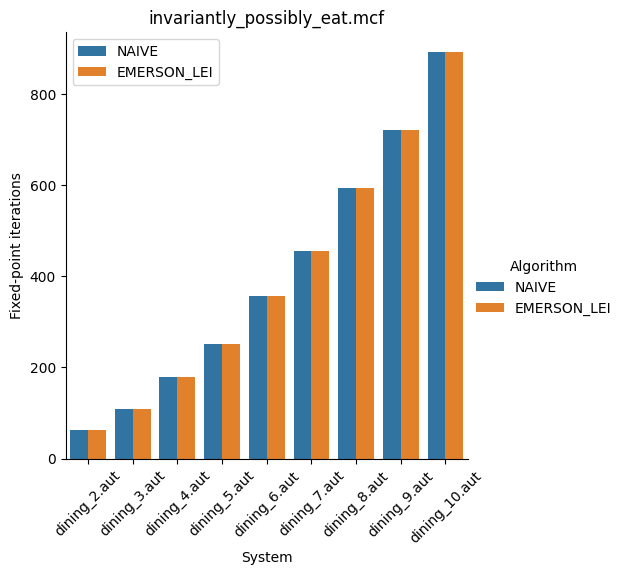

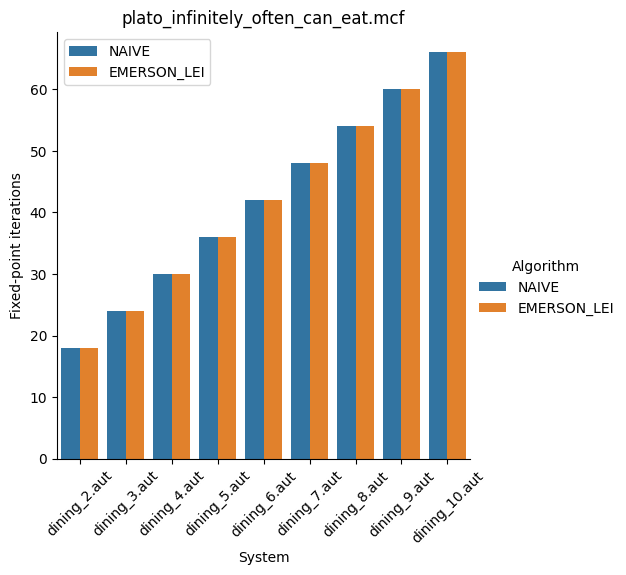

In [19]:
# fixed point iterations
for formula_name in df["Formula"].unique():
    plot = sns.catplot(data=df[df["Formula"] == formula_name], kind="bar",
                    x="System", y="ifp", hue="Algorithm")
    plot.set_xticklabels(rotation=45)
    plot.set(ylabel="Fixed-point iterations")
    plt.legend(loc='upper left')
    plot.set(title=formula_name)

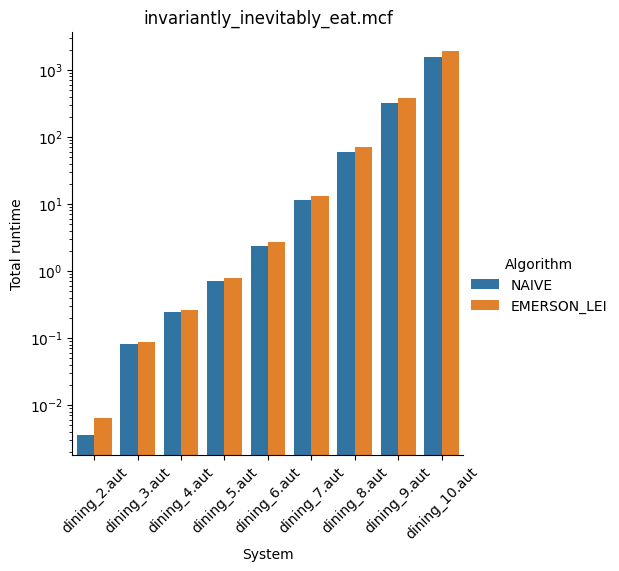

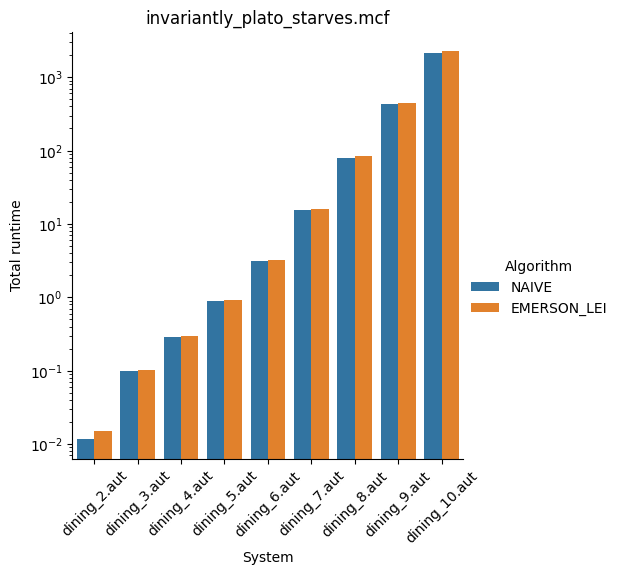

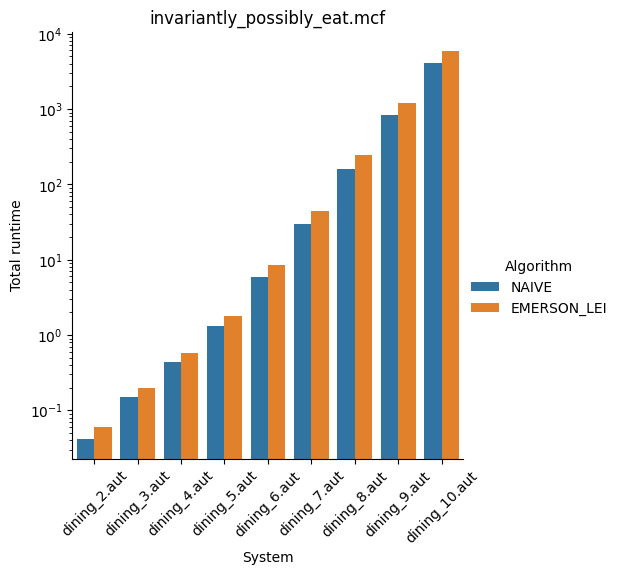

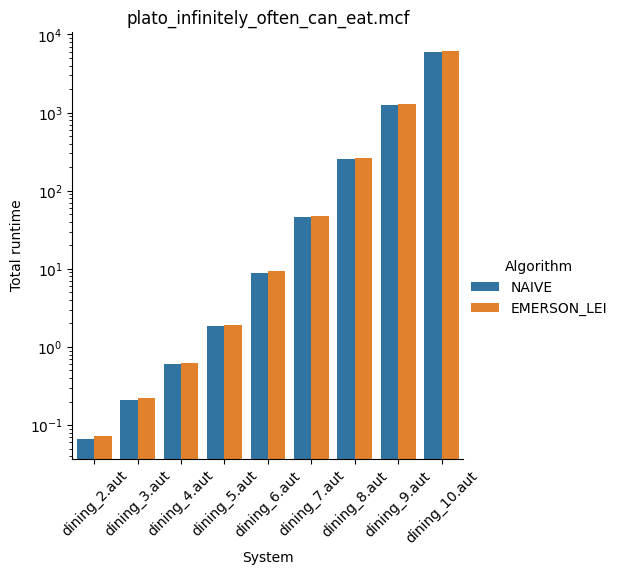

In [12]:
# total runtime
for formula_name in df["Formula"].unique():
    plot = sns.catplot(data=df[df["Formula"] == formula_name], kind="bar",
                    x="System", y="ttot", hue="Algorithm")
    plot.set_xticklabels(rotation=45)
    plot.set(yscale='log', title=formula_name, ylabel="Total runtime")